# Current

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np  
import pandas as pd 
from numpy import ma
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 

from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras.utils import np_utils, to_categorical
from keras.datasets import imdb


#from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.optimizers import Adam

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#folder_path = "/content/drive/MyDrive/Paper/Dataset"
folder_path = "C:/Users/qhrrl/CodeExamples/3.Paper/anomaly_detection/"

df = pd.read_csv(folder_path + "TimeSeries.csv")

In [3]:
print(len(df))
print(df.shape)

509632
(509632, 11)


In [4]:
df

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
0,-2.00,1.51,10.14,0.0,0.0,0.0,-15.78,-22.31,-11.70,-13.57,92.95
1,-2.00,1.51,10.13,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
2,-2.00,1.51,10.13,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
3,-1.99,1.51,10.17,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
4,-1.99,1.51,10.17,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
...,...,...,...,...,...,...,...,...,...,...,...
509627,-8.27,-11.98,-9.35,0.0,0.0,0.0,30.00,8.24,13.90,-7.06,-32.33
509628,-8.27,-12.00,-9.41,0.0,0.0,0.0,30.00,8.24,13.90,-7.07,-32.34
509629,-8.25,-11.98,-9.40,0.0,0.0,0.0,30.00,8.24,13.90,-7.08,-32.35
509630,-8.27,-12.00,-9.41,0.0,0.0,0.0,30.00,8.24,13.90,-7.09,-32.36


In [176]:
pd_tr_labels = pd_tr.iloc[:, -1]
pd_v_labels = pd_v.iloc[:, -1]

# Extract Labels

In [177]:
# pd_tr = pd_tr.drop(columns = ['Date','WATT']) # 여기서 라벨을 떼면 뒤에 데이터를 못 나눈다
# pd_v = pd_v.drop(columns = ['Date','WATT'])

In [178]:
#여기말고 나누고 쳐내는게 맞겠다.

# pd_tr = pd_tr.drop(["R_Skewness", "S_Skewness", "T_Skewness", "R_Kurtosis", "R_Impulse", "ST_phase", "TR_phase","T_Kurtosis", "RS_Level"],axis=1)
# pd_v = pd_v.drop(["R_Skewness", "S_Skewness", "T_Skewness", "R_Kurtosis", "R_Impulse", "ST_phase", "TR_phase","T_Kurtosis", "RS_Level"],axis=1)

# 1. Current

In [179]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pd_tr, pd_tr_labels, stratify=pd_tr_labels, test_size=0.2, random_state=42)

In [180]:
print(x_train.shape)
print(x_test.shape)

print("="*50)

print(y_train.shape)
print(y_test.shape)

print("="*50)

x_valid = pd_v
y_valid = pd_v_labels

print(x_valid.shape)
print(y_valid.shape)

(244427, 48)
(61107, 48)
(244427,)
(61107,)
(38210, 48)
(38210,)


## 1.2 99.5 : 0.5 으로 데이터 숫자 조정

In [181]:
print(pd_tr.shape)
print(pd_v.shape)

(305534, 48)
(38210, 48)


In [182]:
lb_t_1 = [] # label_training_1
lb_t_2 = []
lb_t_3 = []
lb_t_4 = []

lb_v_1 = []
lb_v_2 = []
lb_v_3 = []
lb_v_4 = []

In [183]:
np_tr_99 = pd_tr.to_numpy()
np_v_99 = pd_v.to_numpy()

In [184]:
def label_extract(data):
    lb_1 = []
    lb_2 = []
    lb_3 = []
    lb_4 = []
    lb_0 = []
    for i in data:
        if i[:][-1] == 1:
            lb_1.append(i)
        elif i[:][-1] == 2:
            lb_2.append(i)
        elif i[:][-1] == 3:
            lb_3.append(i)
        elif i[:][-1] == 4:
            lb_4.append(i)
        elif i[:][-1] == 0:
            lb_0.append(i)
    return lb_1, lb_2, lb_3, lb_4, lb_0

In [185]:
lb_t_1, lb_t_2, lb_t_3, lb_t_4, lb_t_0 = label_extract(np_tr_99)
lb_v_1, lb_v_2, lb_v_3, lb_v_4, lb_v_0 = label_extract(np_v_99)

In [186]:
print((len(pd_cur_train_origin)) == (len(lb_t_1) + len(lb_t_2)+len(lb_t_3) + len(lb_t_4) + len(lb_t_0)))
print((len(pd_cur_val_origin)) == (len(lb_v_1) + len(lb_v_2)+len(lb_v_3) + len(lb_v_4) + len(lb_v_0)))

True
True


In [187]:
print(len(lb_t_0) * 0.01)

2181.94


반올림해서 0.4 제거 후 30553 중에서 4개의 유형으로 쪼개야 하니 

In [188]:
split_n = int(len(lb_t_0) * 0.01 / 4)
print(split_n)

545


각 데이터 당, 545 개 씩 추출을 해야한다.

In [189]:
import random

lb_t_1 = random.sample(lb_t_1, split_n)
lb_t_2 = random.sample(lb_t_2, split_n)
lb_t_3 = random.sample(lb_t_3, split_n)
lb_t_4 = random.sample(lb_t_4, split_n)

In [190]:
print(len(lb_t_1))

545


In [191]:
# 비교해보자 
print(len(lb_t_0) * 0.01)
print(len(lb_t_1) + len(lb_t_2)+len(lb_t_3) + len(lb_t_4))

2181.94
2180


다시 붙여주자 

In [192]:
pd_lb_t_0 = pd.DataFrame(lb_t_0)
pd_lb_t_1 = pd.DataFrame(lb_t_1)
pd_lb_t_2 = pd.DataFrame(lb_t_2)
pd_lb_t_3 = pd.DataFrame(lb_t_3)
pd_lb_t_4 = pd.DataFrame(lb_t_4)

cur_train_99 = pd.concat([pd_lb_t_0, pd_lb_t_1, pd_lb_t_2, pd_lb_t_3, pd_lb_t_4], axis=0)

In [193]:
cur_train_99

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,2020-11-13 07:43:41,3.643555,3.883789,4.124023,2.152260,2.154582,2.290735,7.126953,7.527344,7.687500,2.393055,2.405278,2.559434,0.003421,0.002011,-0.002092,1.491381,1.539047,1.517514,2.978182,3.129510,3.003594,1.111880,1.116355,1.117298,1.692897,1.802572,1.800306,-3.141593,3.141593,-3.141593,-0.181417,2.754963,-2.573546,0.002448,0.004323,0.003780,3.536451,3.553066,3.763136,0.021705,0.023957,0.020911,0.057528,0.057195,0.057517,2.2,0
1,2020-11-13 07:43:41,3.643555,3.803711,4.164062,2.161249,2.163811,2.301946,7.126953,7.447266,7.727539,2.405001,2.415769,2.573205,0.000052,0.008745,-0.003142,1.491265,1.538511,1.518381,2.963389,3.082773,3.003080,1.112783,1.116442,1.117839,1.685856,1.757876,1.808932,-3.141593,-3.141593,-3.141593,-0.181857,2.755303,-2.573446,0.007313,0.011833,0.012369,3.521399,3.533756,3.747315,0.009876,0.010175,0.010687,0.011616,0.013211,0.010941,2.2,0
2,2020-11-13 07:43:41,3.683594,3.803711,4.164062,2.152920,2.151939,2.289333,7.166992,7.367188,7.727539,2.394561,2.401572,2.559190,0.004258,0.002918,-0.004127,1.491505,1.537529,1.517569,2.993029,3.067652,3.019525,1.112239,1.116004,1.117876,1.710975,1.767573,1.818897,-3.141593,-3.141593,3.141593,-0.103641,2.676847,-2.573206,0.010866,0.016296,0.012448,3.506221,3.519853,3.728701,0.017622,0.011568,0.014016,0.012954,0.016530,0.011328,2.2,0
3,2020-11-13 07:44:42,3.553467,3.753662,3.993896,2.134172,2.111470,2.258483,6.966797,7.247070,7.487305,2.371624,2.353266,2.520865,-0.000152,0.001546,0.000843,1.490338,1.533833,1.517199,2.937564,3.079579,2.970133,1.111262,1.114516,1.116176,1.665033,1.777748,1.768398,-3.141593,3.141593,-3.141593,-0.099437,2.592504,-2.493067,0.008985,0.014649,0.011038,3.385902,3.359254,3.581625,0.011735,0.008646,0.012069,0.008928,0.008072,0.006405,2.2,0
4,2020-11-13 07:44:42,3.593506,3.713623,4.073975,2.137425,2.114743,2.260646,7.006836,7.247070,7.607422,2.374335,2.356919,2.524138,0.001741,0.006429,-0.004894,1.489275,1.535224,1.518454,2.951073,3.074806,3.013869,1.110839,1.114518,1.116556,1.681231,1.756063,1.802129,-3.141593,3.141593,3.141593,-0.141278,2.634706,-2.493428,0.007743,0.009151,0.007339,3.380960,3.354816,3.573826,0.007737,0.006841,0.007718,0.011826,0.016674,0.015070,2.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2021-02-01 09:20:28,3.923828,4.244141,3.883789,2.162550,2.260365,2.130198,7.647461,8.087891,7.327148,2.422519,2.535833,2.380814,-0.001043,-0.002810,0.003008,1.536194,1.535273,1.504256,3.156821,3.189442,3.077581,1.120214,1.121868,1.117649,1.814445,1.877635,1.823205,-3.141593,-3.141593,3.141593,-0.246521,3.055416,-2.808896,0.038284,0.028145,0.029937,3.475584,3.630410,3.402753,0.032822,0.039416,0.039435,0.008274,0.011170,0.012242,2.2,4
541,2020-11-27 09:44:40,4.114014,4.254150,4.354248,2.317741,2.345058,2.368120,8.208008,8.488281,8.608398,2.565389,2.615674,2.623164,-0.007842,-0.005381,0.004690,1.497498,1.546772,1.520381,3.199518,3.245160,3.281685,1.106849,1.115398,1.107699,1.775010,1.814092,1.838694,3.141593,-3.141593,-3.141593,-0.141238,3.236673,-3.095435,0.011463,0.010226,0.013758,3.775129,3.853328,3.854609,0.019651,0.018864,0.022646,0.026355,0.026668,0.026112,2.2,4
542,2020-11-23 04:18:05,4.033936,4.254150,4.154053,2.383315,2.445105,2.385898,8.007812,8.448242,8.167969,2.628925,2.727283,2.632066,-0.011192,-0.003106,0.004881,1.472531,1.544534,1.494731,3.046040,3.097677,3.103254,1.103054,1.115405,1.103176,1.692573,1.739864,1.741086,3.141593,3.141593,3.141593,-0.259433,3.233330,-2.973896,0.029913,0.023804,0.020584,3.870362,4.018053,3.869448,0.025109,0.032075,0.027805,0.025609,0.026685,0.020238,2.2,4
543,2021-01-30 12:01:40,3.923828,4.244141,4.083984,2.167375,2.278363,2.166874,7.647461,8.087891,7.647461,2.425845,2.552607,2.418923,0.002977,-0.002778,0.00164

In [194]:
cur_train_99.columns = [
        'Date',
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness', 'T_Skewness', 'R_Kurtosis', 'S_Kurtosis', 'T_Kurtosis',
        'R_Crest', 'S_Crest', 'T_Crest', 'R_Shape', 'S_Shape', 'T_Shape',
        'R_Impulse', 'S_Impulse', 'T_Impulse',
        'RS_phase', 'ST_phase', 'TR_phase', 'RS_Level', 'ST_Level', 'TR_Level',
        'R_1x', 'S_1x', 'T_1x', 'R_2x', 'S_2x', 'T_2x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
        'WATT','LABEL'
        ]

In [195]:
cur_train_99.head(3)

,Date,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,S_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,T_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,R_Impulse,S_Impulse,T_Impulse,RS_phase,ST_phase,TR_phase,RS_Level,ST_Level,TR_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,WATT,LABEL
0,2020-11-13 07:43:41,3.643555,3.883789,4.124023,2.152260,2.154582,2.290735,7.126953,7.527344,7.687500,2.393055,2.405278,2.559434,0.003421,0.002011,-0.002092,1.491381,1.539047,1.517514,2.978182,3.129510,3.003594,1.111880,1.116355,1.117298,1.692897,1.802572,1.800306,-3.141593,3.141593,-3.141593,-0.181417,2.754963,-2.573546,0.002448,0.004323,0.003780,3.536451,3.553066,3.763136,0.021705,0.023957,0.020911,0.057528,0.057195,0.057517,2.2,0
1,2020-11-13 07:43:41,3.643555,3.803711,4.164062,2.161249,2.163811,2.301946,7.126953,7.447266,7.727539,2.405001,2.415769,2.573205,0.000052,0.008745,-0.003142,1.491265,1.538511,1.518381,2.963389,3.082773,3.003080,1.112783,1.116442,1.117839,1.685856,1.757876,1.808932,-3.141593,-3.141593,-3.141593,-0.181857,2.755303,-2.573446,0.007313,0.011833,0.012369,3.521399,3.533756,3.747315,0.009876,0.010175,0.010687,0.011616,0.013211,0.010941,2.2,0
2,2020-11-13 07:43:41,3.683594,3.803711,4.164062,2.152920,2.151939,2.289333,7.166992,7.367188,7.727539,2.394561,2.401572,2.559190,0.004258,0.002918,-0.004127,1.491505,1.537529,1.517569,2.993029,3.067652,3.019525,1.112239,1.116004,1.117876,1.710975,1.767573,1.818897,-3.141593,-3.141593,3.141593,-0.103641,2.676847,-2.573206,0.010866,0.016296,0.012448,3.506221,3.519853,3.728701,0.017622,0.011568,0.014016,0.012954,0.016530,0.011328,2.2,0


# CUR ____ TR

In [196]:
print(len(pd_cur_val_origin))
print(len(lb_v_1) + len(lb_v_2)+len(lb_v_3) + len(lb_v_4) + len(lb_v_0))

38210
38210


In [197]:
split_n = int((len(lb_v_0) * 0.01) / 4)
print(split_n)

68


In [198]:
lb_v_1 = random.sample(lb_v_1, split_n)
lb_v_2 = random.sample(lb_v_2, split_n)
lb_v_3 = random.sample(lb_v_3, split_n)
lb_v_4 = random.sample(lb_v_4, split_n)

In [199]:
len(lb_v_1)

68

In [200]:
# 비교해보자 
print(len(lb_v_0) * 0.01)
print(len(lb_v_1) + len(lb_v_2)+len(lb_v_3) + len(lb_v_4))

272.85
272


In [201]:
pd_lb_v_0 = pd.DataFrame(lb_v_0)
pd_lb_v_1 = pd.DataFrame(lb_v_1)
pd_lb_v_2 = pd.DataFrame(lb_v_2)
pd_lb_v_3 = pd.DataFrame(lb_v_3)
pd_lb_v_4 = pd.DataFrame(lb_v_4)

cur_val_99 = pd.concat([pd_lb_v_0, pd_lb_v_1, pd_lb_v_2, pd_lb_v_3, pd_lb_v_4], axis=0)

In [202]:
cur_val_99

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,2020-11-04 20:12:54,3.793701,3.793701,4.154053,2.205342,2.169747,2.309003,7.327148,7.447266,7.727539,2.452880,2.421350,2.580566,0.004550,-0.000971,0.001870,1.490127,1.533284,1.518926,2.987162,3.075667,2.994513,1.112245,1.115959,1.117611,1.720233,1.748453,1.799068,-3.141593,3.141593,3.141593,-0.141378,2.756204,-2.614826,0.008610,0.006704,0.005422,3.463338,3.417413,3.626784,0.011671,0.012673,0.015285,0.014712,0.013995,0.008425,2.2,0
1,2020-11-04 20:12:54,3.673584,3.793701,4.154053,2.201408,2.165643,2.310865,7.207031,7.367188,7.687500,2.448460,2.416888,2.583111,0.001769,0.004248,-0.000203,1.488829,1.533670,1.519016,2.943496,3.048213,2.976062,1.112225,1.116014,1.117812,1.668743,1.751767,1.797618,-3.141593,3.141593,3.141593,-0.060539,2.675265,-2.614726,0.007360,0.006500,0.007636,3.490693,3.443414,3.666574,0.007045,0.007379,0.006799,0.006815,0.015612,0.010616,2.2,0
2,2020-11-04 20:12:54,3.673584,3.833740,4.154053,2.197003,2.162560,2.308042,7.207031,7.407227,7.727539,2.442441,2.413953,2.580329,0.005779,-0.001246,-0.000570,1.487704,1.533323,1.518998,2.950749,3.068504,2.994789,1.111715,1.116248,1.117973,1.672088,1.772779,1.799817,-3.141593,3.141593,-3.141593,-0.056795,2.673964,-2.617168,0.006502,0.005655,0.004288,3.484169,3.443272,3.664395,0.013236,0.011662,0.011017,0.014893,0.014687,0.008664,2.2,0
3,2020-11-04 20:13:52,3.803711,3.803711,4.164062,2.205392,2.169797,2.309413,7.327148,7.447266,7.727539,2.453230,2.421792,2.581679,0.004550,-0.000971,0.001870,1.490127,1.533284,1.518926,2.986735,3.075105,2.993222,1.112379,1.116138,1.117894,1.724733,1.753026,1.803083,-3.141593,3.141593,3.141593,-0.141378,2.756204,-2.614826,0.008610,0.006704,0.005422,3.463338,3.417413,3.626784,0.011671,0.012673,0.015285,0.014712,0.013995,0.008425,2.2,0
4,2020-11-04 20:13:52,3.683594,3.803711,4.164062,2.201448,2.165733,2.311195,7.207031,7.367188,7.687500,2.448811,2.417328,2.584219,0.001769,0.004248,-0.000203,1.488829,1.533670,1.519016,2.943074,3.047658,2.974786,1.112364,1.116171,1.118131,1.673260,1.756316,1.801693,-3.141593,3.141593,3.141593,-0.060539,2.675265,-2.614726,0.007360,0.006500,0.007636,3.490693,3.443414,3.666574,0.007045,0.007379,0.006799,0.006815,0.015612,0.010616,2.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020-11-03 21:18:03,4.098999,4.389282,4.259155,2.444800,2.522986,2.462057,8.167969,8.688477,8.408203,2.707278,2.817269,2.730550,-0.009245,-0.002507,0.006013,1.482517,1.535197,1.515165,3.017041,3.084007,3.079308,1.107362,1.116640,1.109052,1.676619,1.739717,1.729917,3.141593,3.141593,3.141593,-0.292505,3.353387,-3.060881,0.015706,0.014551,0.013413,4.013432,4.180293,4.047561,0.022645,0.021511,0.021657,0.029298,0.013492,0.024494,2.2,4
64,2021-01-21 14:26:45,3.843750,4.124023,3.803711,2.183070,2.283768,2.162250,7.527344,7.807617,7.166992,2.444272,2.559501,2.413223,0.001566,-0.000997,-0.000315,1.527269,1.522231,1.486834,3.079586,3.050445,2.969884,1.119649,1.120736,1.116071,1.760709,1.805798,1.759145,-3.141593,3.141593,3.141593,-0.134411,2.897562,-2.763151,0.026337,0.024540,0.024450,3.499118,3.651593,3.438307,0.024639,0.027316,0.028879,0.004319,0.016114,0.008935,2.2,4
65,2021-01-20 05:58:06,3.843750,4.284180,3.923828,2.156764,2.296080,2.163871,7.527344,8.087891,7.447266,2.418074,2.580644,2.417089,0.001633,-0.002171,0.001879,1.523236,1.529406,1.486196,3.112950,3.134060,3.081088,1.121158,1.123934,1.117021,1.782184,1.865867,1.813337,-3.141593,-3.141593,3.141593,-0.254588,3.017059,-2.762470,0.025312,0.024480,0.024495,3.665007,3.901317,3.652716,0.022886,0.023607,0.024540,0.008201,0.008697,0.008391,2.2,4
66,2020-11-05 20:15:27,4.554443,4.814697,4.754639,2.517957,2.600887,2.533342,9.048828,9.569336,9.369141,2.801026,2.917654,2.830122,-0.004164,-0.007920,0.004517,1.5283

In [203]:
cur_val_99.columns = [
        'Date',
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness', 'T_Skewness', 'R_Kurtosis', 'S_Kurtosis', 'T_Kurtosis',
        'R_Crest', 'S_Crest', 'T_Crest', 'R_Shape', 'S_Shape', 'T_Shape',
        'R_Impulse', 'S_Impulse', 'T_Impulse',
        'RS_phase', 'ST_phase', 'TR_phase', 'RS_Level', 'ST_Level', 'TR_Level',
        'R_1x', 'S_1x', 'T_1x', 'R_2x', 'S_2x', 'T_2x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
        'WATT','LABEL'
        ]

In [204]:
cur_val_99.head(3)

,Date,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,S_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,T_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,R_Impulse,S_Impulse,T_Impulse,RS_phase,ST_phase,TR_phase,RS_Level,ST_Level,TR_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,WATT,LABEL
0,2020-11-04 20:12:54,3.793701,3.793701,4.154053,2.205342,2.169747,2.309003,7.327148,7.447266,7.727539,2.452880,2.421350,2.580566,0.004550,-0.000971,0.001870,1.490127,1.533284,1.518926,2.987162,3.075667,2.994513,1.112245,1.115959,1.117611,1.720233,1.748453,1.799068,-3.141593,3.141593,3.141593,-0.141378,2.756204,-2.614826,0.008610,0.006704,0.005422,3.463338,3.417413,3.626784,0.011671,0.012673,0.015285,0.014712,0.013995,0.008425,2.2,0
1,2020-11-04 20:12:54,3.673584,3.793701,4.154053,2.201408,2.165643,2.310865,7.207031,7.367188,7.687500,2.448460,2.416888,2.583111,0.001769,0.004248,-0.000203,1.488829,1.533670,1.519016,2.943496,3.048213,2.976062,1.112225,1.116014,1.117812,1.668743,1.751767,1.797618,-3.141593,3.141593,3.141593,-0.060539,2.675265,-2.614726,0.007360,0.006500,0.007636,3.490693,3.443414,3.666574,0.007045,0.007379,0.006799,0.006815,0.015612,0.010616,2.2,0
2,2020-11-04 20:12:54,3.673584,3.833740,4.154053,2.197003,2.162560,2.308042,7.207031,7.407227,7.727539,2.442441,2.413953,2.580329,0.005779,-0.001246,-0.000570,1.487704,1.533323,1.518998,2.950749,3.068504,2.994789,1.111715,1.116248,1.117973,1.672088,1.772779,1.799817,-3.141593,3.141593,-3.141593,-0.056795,2.673964,-2.617168,0.006502,0.005655,0.004288,3.484169,3.443272,3.664395,0.013236,0.011662,0.011017,0.014893,0.014687,0.008664,2.2,0


In [205]:
print(cur_train_99.shape)
print(cur_val_99.shape)

(220374, 48)
(27557, 48)


In [207]:
pd_cur_tr_99 = cur_train_99.drop(columns = ['Date','WATT','LABEL'])
pd_cur_val_99 = cur_val_99.drop(columns = ['Date','WATT','LABEL'])

pd_cur_tr_99 = pd_cur_tr_99.drop(["R_Skewness", "S_Skewness", "T_Skewness", "R_Kurtosis", "R_Impulse", "ST_phase", "TR_phase","T_Kurtosis", "RS_Level"],axis=1)
pd_cur_val_99 = pd_cur_val_99.drop(["R_Skewness", "S_Skewness", "T_Skewness", "R_Kurtosis", "R_Impulse", "ST_phase", "TR_phase","T_Kurtosis", "RS_Level"],axis=1)

In [208]:
pd_cur_tr_99.head(3)

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,S_RMS,T_RMS,S_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,S_Impulse,T_Impulse,RS_phase,ST_Level,TR_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x
0,3.643555,3.883789,4.124023,2.152260,2.154582,2.290735,7.126953,7.527344,7.687500,2.393055,2.405278,2.559434,1.539047,2.978182,3.129510,3.003594,1.111880,1.116355,1.117298,1.802572,1.800306,-3.141593,2.754963,-2.573546,0.002448,0.004323,0.003780,3.536451,3.553066,3.763136,0.021705,0.023957,0.020911,0.057528,0.057195,0.057517
1,3.643555,3.803711,4.164062,2.161249,2.163811,2.301946,7.126953,7.447266,7.727539,2.405001,2.415769,2.573205,1.538511,2.963389,3.082773,3.003080,1.112783,1.116442,1.117839,1.757876,1.808932,-3.141593,2.755303,-2.573446,0.007313,0.011833,0.012369,3.521399,3.533756,3.747315,0.009876,0.010175,0.010687,0.011616,0.013211,0.010941
2,3.683594,3.803711,4.164062,2.152920,2.151939,2.289333,7.166992,7.367188,7.727539,2.394561,2.401572,2.559190,1.537529,2.993029,3.067652,3.019525,1.112239,1.116004,1.117876,1.767573,1.818897,-3.141593,2.676847,-2.573206,0.010866,0.016296,0.012448,3.506221,3.519853,3.728701,0.017622,0.011568,0.014016,0.012954,0.016530,0.011328


In [209]:
np_cur_tr_99 = pd_cur_tr_99.to_numpy()
np_cur_val_99 = pd_cur_val_99.to_numpy()

#라벨 추출
np_tr_99 = cur_train_99.to_numpy()
np_vl_99 = cur_val_99.to_numpy()

In [210]:
tr_lb_99 = np_tr_99[:,-1]
v_lb_99 = np_vl_99[:, -1]

print(tr_lb_99)
print(v_lb_99)

[0 0 0 ... 4 4 4]
[0 0 0 ... 4 4 4]


In [235]:
x_train, x_test, y_train, y_test = train_test_split(pd_cur_tr_99, tr_lb_99, test_size=0.2, random_state=42)

In [236]:
print(x_train.shape)
print(x_test.shape)

print("="*50)

print(y_train.shape)
print(y_test.shape)

print("="*50)

x_valid = pd_cur_val_99
y_valid = v_lb_99

print(x_valid.shape)
print(y_valid.shape)

(176299, 36)
(44075, 36)
(176299,)
(44075,)
(27557, 36)
(27557,)


In [237]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))  # classes = array([-1,  1])
classes

array([0, 1, 2, 3, 4], dtype=object)

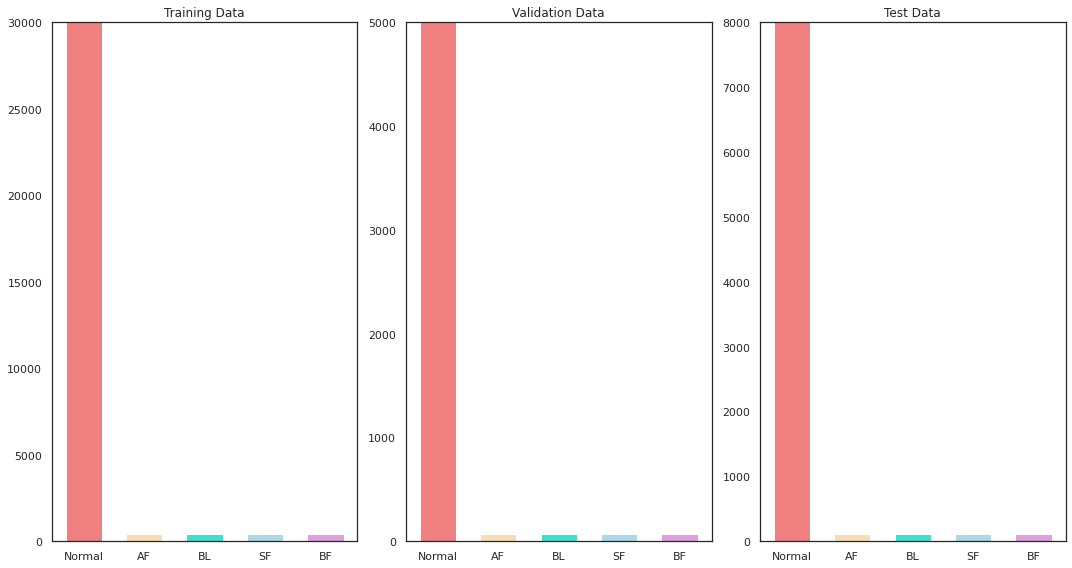

In [238]:
x = np.arange(len(classes))  # Plot의 X축의 개수 구하기

labels = ["Normal", "AF", "BL", "SF", "BF"]   # Plot의 X축의 이름 구하기

values_train = [(y_train_99 == i).sum() for i in classes]  # Train 데이터의 정상/비정상 각 총 개수
values_valid = [(y_valid == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수
values_test = [(y_test_99 == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수

plt.figure(figsize=(15,8))  # Plot 틀(Figure)의 Size 설정 (5X3)

plt.subplot(1,3,1)   # Plot 틀(Figure) 내 3개의 subplot 중 첫 번째(왼쪽) 지정
plt.title("Training Data")  # subplot 제목
plt.bar(x, values_train, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Train 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 30000])
plt.xticks(x, labels)  # X축에 변수 기입

plt.subplot(1,3,2)  # Plot 틀(Figure) 내 3개의 subplot 중 두 번째(가운데) 지정
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6,color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 5000])
plt.xticks(x, labels)  

plt.subplot(1,3,3)  # Plot 틀(Figure) 내 3개의 subplot 중 세 번째(오른쪽) 지정
plt.title("Test Data")
plt.bar(x, values_test, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 8000])
plt.xticks(x, labels)

plt.tight_layout()  # 그림 저장
plt.savefig(folder_path +'/img/99.5%_data_status.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()  # 그림 출력

In [239]:
# CNN, RNN 모델의 입력 변수는 채널 축 1개 차원을 확장시킨 3D Tensor이다.
# 즉 아래 CNN, RNN 모델은 x_train, x_valid, x_test를 입력 변수로 넣지 않고, 
# x_train_exp, x_valid_exp, x_test_exp을 넣는다. 
x_train_exp = np.expand_dims(x_train, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_train
x_valid_exp = np.expand_dims(x_valid, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_vaild 
x_test_exp = np.expand_dims(x_test, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_test

# 위와 동일한 코드
# x_train_exp = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
# x_valid_exp = x_train.reshape((x_valid.shape[0], x_valid.shape[1], 1))
# x_test_exp = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print("x_train_exp의 형태:", x_train_exp.shape)
print("y_train_exp의 형태:", y_train.shape)

print("=" * 50)

print("x_valid_exp의 형태:", x_valid_exp.shape)
print("y_valid_exp의 형태:", y_valid.shape)

print("=" * 50)

print("x_test_exp의 형태:", x_test_exp.shape)
print("y_test_exp의 형태:", y_test.shape)

x_train_exp의 형태: (176299, 36, 1)
y_train_exp의 형태: (176299,)
x_valid_exp의 형태: (27557, 36, 1)
y_valid_exp의 형태: (27557,)
x_test_exp의 형태: (44075, 36, 1)
y_test_exp의 형태: (44075,)


In [256]:
x_train_exp = np.asarray(x_train_exp).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')
x_valid_exp = np.asarray(x_valid_exp).astype('float32')


x_test_exp = np.asarray(x_test_exp).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# LSTM

In [249]:
def make_lstm_model():
  model=Sequential()
  model.add(LSTM(units=256, return_sequences=True))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model. add(Dense(5, activation='softmax'))
  return model

In [250]:
lstm = make_lstm_model()

In [251]:
EPOCHS = 300
BATCH_SIZE = 64

In [252]:
lstm.compile(loss="sparse_categorical_crossentropy", 
                  optimizer='adam', 
                  metrics=["accuracy"]
                 )

In [253]:
callbacks = [ModelCheckpoint(folder_path + '/best_model.h5',
                             monitor='val_loss',
                             save_best_only=True),
             ReduceLROnPlateau(
                 monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
                 ),
             EarlyStopping(monitor="val_loss", patience=10, verbose=1)
             ]

In [254]:
history = lstm.fit(
    x_train_exp,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1
)

Epoch 1/300
2755/2755 [==============================] - 18s 5ms/step - loss: 0.0627 - accuracy: 0.9902 - val_loss: 0.0531 - val_accuracy: 0.9901
Epoch 2/300
2755/2755 [==============================] - 13s 5ms/step - loss: 0.0465 - accuracy: 0.9906 - val_loss: 0.0555 - val_accuracy: 0.9839
Epoch 3/300
2755/2755 [==============================] - 13s 5ms/step - loss: 0.0324 - accuracy: 0.9922 - val_loss: 0.0728 - val_accuracy: 0.9834
Epoch 4/300
2755/2755 [==============================] - 13s 5ms/step - loss: 0.0291 - accuracy: 0.9926 - val_loss: 0.0483 - val_accuracy: 0.9833
Epoch 5/300
2755/2755 [==============================] - 13s 5ms/step - loss: 0.0261 - accuracy: 0.9932 - val_loss: 0.0675 - val_accuracy: 0.9830
Epoch 6/300
2755/2755 [==============================] - 13s 5ms/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 0.0590 - val_accuracy: 0.9835
Epoch 7/300
2755/2755 [==============================] - 13s 5ms/step - loss: 0.0231 - accuracy: 0.9939 - val_loss: 0.0767 -

In [257]:
scores = lstm.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (lstm.metrics_names[1], scores[1]*100))

1378/1378 [==============================] - 4s 3ms/step - loss: 0.0160 - accuracy: 0.9951

Test accuracy 0.995076596736908

Test loss 0.016032325103878975
accuracy: 99.51%
